<a href="https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_01_Arboles/01_A_%C3%81rboles_Decisi%C3%B3n_Clasificaci%C3%B3n_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 INTRO: Árboles de Decisión
Explicación de cómo construír árboles de decisión.

Notebook por [Javier Blanco Cordero](https://www.linkedin.com/in/javier-blanco-cordero-71373656/).

### Enlaces de interés
*   [Slides de presentación](https://docs.google.com/presentation/d/16tnAAaiT6mrelG8zRg26crXAChWmzjOG2NyA0oyh4X0/edit?usp=sharing)
*   [Enlace a este notebook en Colab](https://colab.research.google.com/github/JotaBlanco/TheValley/blob/main/Arboles/Clase_01_Arboles/01_%C3%81rboles_Decisi%C3%B3n_Clasificaci%C3%B3n_Resuelto.ipynb)




## 0101 Qué es un árbol de decisión?
Un tipo de algoritmo de aprendizaje supervisado que se basa en realizar particiones a partir de distintos niveles de las variables disponibles.

## 0102 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)): pandas, numpy, seaborn, matplotlib.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0103 Carga el dataset de accidentes cardiacos
Para probar a hacer árboles de decisión utilizaremos un dataset sobre accidentes coronarios que he encontrado en Kaggle ([aquí](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)). 

Podéis encontrar el archivo listo para importar en mi github: 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/heart_failure.csv'. 

Importa este dataset en un dataframe llamado **df**.

In [2]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/heart_failure.csv'

# Importa csv
df = pd.read_csv(url)

# Visualización primeras filas
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# 02 EDA
Realizaremos un pequeño análisis exploratorio visual para familiarizarnos con el dataset. 

Recuerda que puedes encontrar mis clases sobre análisis exploratorio [aquí](https://github.com/JotaBlanco/TheValley/tree/main/EDA/).

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
# Visualización coeficientes Pearson
plt.figure(figsize=(8,7))
sns.heatmap(np.round(df.corr(),2), 
            vmin=-1, vmax=1, 
            annot=True, cmap="coolwarm")
plt.show()

# 03 Construcción árbol de decisión a mano
Nunca lo haremos en la vida real, pero para afianzar el entendimiento de este tipo de algoritmos, vamos a reproducir el proceso de entrenamiento a mano.

## 0301 DataFrame
Para simplificar, haremos esto con un dataframe consistente solo en las columnas ['age', 'anaemia', 'serum_creatinine', 'DEATH_EVENT'] renombradas como ['Edad', 'Anemia', 'Serum', 'Fallece'].

In [ ]:
df_resumen = df[['age', 'anaemia', 'serum_creatinine', 'DEATH_EVENT']]
df_resumen.columns = ['Edad', 'Anemia', 'Serum', 'Fallece']
df_resumen.sample(10).reset_index(drop=True)

## 0301 Seleccionamos el nodo raíz
Para seleccionar el nodo raíz generaremos árboles muy sencillos, de solo 3 nodos (una sola partición).

### 030101 Variable categórica
Probamos a generar un árbol de sólo dos particiones.

In [ ]:
# Podemos hacer la partición Anemia = 1 y Anemia = 0 con un groupby
df_resumen.groupby('Anemia')['Fallece'].agg(['count', 'sum']).reset_index()

In [ ]:
# Guardamos el resultado y le damos nombres más explicativos a las columnas
df_i = df_resumen.groupby('Anemia')['Fallece'].agg(['count', 'sum']).reset_index()
df_i.columns = ['Anemia', 'Total', 'Fallece = 1']
df_i

In [ ]:
#Añadimos más información útil
df_i = df_resumen.groupby('Anemia')['Fallece'].agg(['count', 'sum']).reset_index()
df_i.columns = ['Anemia', 'Total', 'Fallece = 1']
df_i['Fallece = 0'] = df_i['Total'] - df_i['Fallece = 1']
df_i['Mean'] = np.round(df_i['Fallece = 1']/df_i['Total'], 4)
df_i

#### EJERCICIO
Crea la función **particion_categorica** que, dado un dataframe con datos, una variable discreta binaria (como 'Anemia') y una variable target, devuelva un dataframe con información de la partición similar a la que acabamos de generar en la celda anterior.

In [ ]:
def particion_categorica(df, target, var_discreta):
  """
  Genera un dataframe con información sobre la partición utilizando la variable
  discreta binaria aportada.
  """
  df_i = df.groupby(var_discreta)[target].agg(['count', 'sum']).reset_index()
  df_i.columns = [var_discreta, 'Total', target + ' = 1']
  df_i[target + ' = 0'] = df_i['Total'] - df_i[target + ' = 1']
  df_i['Mean'] = np.round(df_i[target + ' = 1']/df_i['Total'], 4)
  return df_i

In [ ]:
df_i = particion_categorica(df_resumen, 'Fallece', 'Anemia')
df_i

### 030102 Variable Continua
Las variables continuas pueden dar lugar a diversas particiones. Veamos la variable 'Edad' como ejemplo.

In [ ]:
# Cuantos valores distintos de edad hay?
df_resumen['Edad'].nunique()

In [ ]:
# Valores distintos de edad en orden 
valores_edad_unicos_ordenados = df_resumen['Edad'].sort_values().unique()
valores_edad_unicos_ordenados 

In [ ]:
# Por tanto hay 46 particiones posibles, en torno a los valores:
valores_particiones = (valores_edad_unicos_ordenados[:-1] + valores_edad_unicos_ordenados[1:])/2
valores_particiones

In [ ]:
# Ahora, podemos hacer un árbol para cada valor de partición. 
# Por ejemplo, para la partición 63.5
df_resumen_i = df_resumen.copy(deep=True)

filtro_i = df_resumen_i['Edad'] > 63.5
df_resumen_i['Edad > 63.5'] = filtro_i.astype(int)

df_resumen_i.head()

In [ ]:
# Ahora podemos generar la partición categórica sobre la oclumna Edad > 63.5
particion_categorica(df_resumen_i, 'Fallece', 'Edad > 63.5')

In [ ]:
# Hagamos un loop que devuelva todas las particiones posibles
for particion in valores_particiones:
  df_resumen_i = df_resumen.copy(deep=True)

  filtro_i = df_resumen_i['Edad'] > particion
  df_resumen_i['Edad > ' + str(particion)] = filtro_i.astype(int)

  df_i = particion_categorica(df_resumen_i, 'Fallece', 'Edad > ' + str(particion))
  display(df_i)

#### EJERCICIO 
Crea la función **particiones_continuas** que, dado un dataframe con datos, una variable continua (como 'Edad' o 'Serum') y una variable target, muestre una serie de dataframes con información para cada una de las particiones. (Devuelve un resultado similar al que acabamos de generar en la celda anterior).

In [ ]:
def particiones_continuas(df, target, var_continua):
  """
  Muestra una serie dataframes con información sobre las distintas particiones 
  posibles utilizando la variable continua aportada.
  """
  valores_edad_unicos_ordenados = df[var_continua].sort_values().unique()
  valores_particiones = (valores_edad_unicos_ordenados[:-1] + 
                         valores_edad_unicos_ordenados[1:])/2

  for valor in valores_particiones:
    df_i = df.copy(deep=True)
    filtro_i = df_i[var_continua] > valor
    df_i[str(var_continua) + ' > ' + str(valor)] = filtro_i.astype(int)
    df_i = particion_categorica(df_i, 
                                'Fallece', 
                                str(var_continua) + ' > ' + str(valor))
    display(df_i)

In [ ]:
particiones_continuas(df_resumen, 'Fallece', 'Edad')

In [ ]:
particiones_continuas(df_resumen, 'Fallece', 'Serum')

### 030103 Impureza de Gini
Calculamos la impureza de Gini de cada una de las particiones.

In [ ]:
# Generemos una función que añade la columna Gini
def gini(df_i):
  df_i['Gini'] = 1 - df_i['Mean']**2 - (1-df_i['Mean'])**2
  df_i['Gini Media Pond'] = np.round(
      (df_i['Gini'][0]*df_i['Total'][0] + 
       df_i['Gini'][1]*df_i['Total'][1])/
       (df_i['Total'][0]+df_i['Total'][1]),
       4)
  return df_i

In [ ]:
gini(df_i)

#### EJERCICIO
Modifica la función particion_categorica para incorporar el Gini como medida de impureza al resultado.

In [ ]:
def particion_categorica(df, target, var_discreta):
  """
  Genera un dataframe con información sobre la partición utilizando la variable
  discreta binaria aportada, incluyendo la medida de impureza con Gini.
  """
  df_i = df.groupby(var_discreta)[target].agg(['count', 'sum']).reset_index()
  df_i.columns = [var_discreta, 'Total', target + ' = 1']
  df_i[target + ' = 0'] = df_i['Total'] - df_i[target + ' = 1']
  df_i['Mean'] = np.round(df_i[target + ' = 1']/df_i['Total'], 4)
  return gini(df_i)

In [ ]:
df_i = particion_categorica(df_resumen, 'Fallece', 'Anemia')
df_i

#### EJERCICIO
Crea la función mejor_particion_continua que devuelve el árbol con la partición óptima (según el Gini) para una variable continua. 

In [ ]:
def mejor_particion_continua(df, target, var_continua):
  """
  Devuelve un dataframe con información sobre la partición ópitma de entre las 
  posibles utilizando la variable continua aportada.
  """
  valores_edad_unicos_ordenados = df[var_continua].sort_values().unique()
  valores_particiones = (valores_edad_unicos_ordenados[:-1] + 
                         valores_edad_unicos_ordenados[1:])/2
  particion_optima = []

  for i, valor in enumerate(valores_particiones):
    df_i = df.copy(deep=True)
    filtro_i = df_i[var_continua] > valor
    df_i[str(var_continua) + ' > ' + str(valor)] = filtro_i.astype(int)
    df_i = particion_categorica(df_i, 
                                'Fallece', 
                                str(var_continua) + ' > ' + str(valor))

    if i == 0:
      particion_optima = df_i
    else:
      if df_i['Gini Media Pond'][0] < particion_optima['Gini Media Pond'][0]:
        particion_optima = df_i
    
  return particion_optima

In [ ]:
mejor_particion_continua(df_resumen, 'Fallece', 'Edad')

In [ ]:
mejor_particion_continua(df_resumen, 'Fallece', 'Serum')

### 030104 Cuál es la mejor partición?

In [ ]:
particion_categorica(df_resumen, 'Fallece', 'Anemia')

In [ ]:
mejor_particion_continua(df_resumen, 'Fallece', 'Edad')

In [ ]:
mejor_particion_continua(df_resumen, 'Fallece', 'Serum')

#### EJEMPLO
Función que devuelve la mejor partición dados un dataframe, una lista de variables continuas y otra de variables discretas variables

In [ ]:
def seleccion_particion(df, target, lista_vars_continuas, lista_vars_binarias):
  particion_optima = []

  for i, var in enumerate(lista_vars_continuas+lista_vars_binarias):
    if var in lista_vars_continuas:
      df_i = mejor_particion_continua(df, target, var)
    if var in lista_vars_binarias:
      df_i = particion_categorica(df,  target, var)
    

    if i == 0:
      particion_optima = df_i
    else:
      if df_i['Gini Media Pond'][0] < particion_optima['Gini Media Pond'][0]:
        particion_optima = df_i
    
  return particion_optima

In [ ]:
seleccion_particion(df_resumen, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

## 0302 Construímos las ramas
Vamos a contruír el resto del árbol sin repetir variables.

In [ ]:
# Realizamos la partición
df_resumen_1 = df_resumen[df_resumen['Serum']>1.815]
df_resumen_2 = df_resumen[df_resumen['Serum']<1.815]

### 030201 Rama Izquierda (1)

In [ ]:
# Siguiente partición
seleccion_particion(df_resumen_1, 'Fallece', ['Edad'], ['Anemia'])

In [ ]:
# Realizamos la siguiente partición
df_resumen_1_1 = df_resumen[((df_resumen['Serum']>1.815)&(df_resumen['Edad']>71))]
df_resumen_1_2 = df_resumen[((df_resumen['Serum']>1.815)&(df_resumen['Edad']<71))]

In [ ]:
# Siguiente partición
seleccion_particion(df_resumen_1_1, 'Fallece', [], ['Anemia'])

In [ ]:
# Siguiente partición
seleccion_particion(df_resumen_1_2, 'Fallece', [], ['Anemia'])

### 030202 Rama derecha (2)

In [ ]:
# Siguiente partición
seleccion_particion(df_resumen_2, 'Fallece', ['Edad'], ['Anemia'])

In [ ]:
# Realizamos la siguiente partición
df_resumen_2_1 = df_resumen[((df_resumen['Serum']<1.815)&(df_resumen['Edad']>79.5))]
df_resumen_2_2 = df_resumen[((df_resumen['Serum']<1.815)&(df_resumen['Edad']<79.5))]

In [ ]:
# Siguiente partición
seleccion_particion(df_resumen_2_1, 'Fallece', [], ['Anemia'])

In [ ]:
# Siguiente partición
seleccion_particion(df_resumen_2_2, 'Fallece', [], ['Anemia'])

### EJERCICIO
Genera un árbol sin restringir la repetición de variables en una misma rama.

In [ ]:
seleccion_particion(df_resumen, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

In [ ]:
df_resumen_1 = df_resumen[(df_resumen['Serum']>1.815)]
df_resumen_2 = df_resumen[(df_resumen['Serum']<1.815)]

In [ ]:
seleccion_particion(df_resumen_1, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

In [ ]:
df_resumen_1_1 = df_resumen[((df_resumen['Serum']>1.815)&(df_resumen['Serum']>2.05))]
df_resumen_1_2 = df_resumen[((df_resumen['Serum']>1.815)&(df_resumen['Serum']<2.05))]

In [ ]:
seleccion_particion(df_resumen_1_1, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

In [ ]:
seleccion_particion(df_resumen_1_2, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

In [ ]:
seleccion_particion(df_resumen_2, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

In [ ]:
df_resumen_2_1 = df_resumen[((df_resumen['Serum']<1.815)&(df_resumen['Edad']>79.5))]
df_resumen_2_2 = df_resumen[((df_resumen['Serum']<1.815)&(df_resumen['Edad']<79.5))]

In [ ]:
seleccion_particion(df_resumen_2_1, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

In [ ]:
seleccion_particion(df_resumen_2_2, 'Fallece', ['Edad', 'Serum'], ['Anemia'])

# 04 Construcción árbol de decisión con scikit learn
Ahora de manera automática, utilizando la librería [scikit learn](https://scikit-learn.org/stable/), la libería básica de referencia para machine learning.

## 0401 Importamos las librerías

In [ ]:
# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree

## 0402 Inicializamos el árbol
Definiendo las características que tendrá.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [ ]:
# Inicializamos un árbol. Por ahora está vacío. 
# Solo definimos cómo queremos que sea en cuanto a su estructura y condiciones de entrenamiento
arbol = tree.DecisionTreeClassifier(max_depth=3)
arbol

## 0403 Entrenamos el modelo
Una vez inicializado y definido el árbol, el método .[fit()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit) realiza el proceso de particionado recursivo que hemos hecho nosotros antes a mano.

In [ ]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
arbol = arbol.fit(X = df_resumen[['Edad', 'Serum', 'Anemia']],  # vars descriptivas
                  y = df_resumen[['Fallece']])                  # var objetico
arbol

##0404 Visualizamos el modelo
Una vez entrenado el modelo, podemos visualizarlo.

In [ ]:
# Con el método export_text en un print()
esquema_print = tree.export_text(arbol, 
                                 feature_names=['Edad', 'Serum', 'Anemia'])
print(esquema_print)

In [ ]:
# O con la librería graphviz
import graphviz 

# Export_graphviz
dot_data = tree.export_graphviz(arbol, 
                                out_file=None, 
                                feature_names=['Edad', 'Serum', 'Anemia']) 
graph = graphviz.Source(dot_data) 
graph

## 0405 Realizamos una predicción
Una vez el modelo está entrenado (definido) podemos pasarle datos para obtener las prediciones correspondientes de la variable objetivo. 

Para esto utilizamos el método .[predict()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict).

In [ ]:
# Predicción
prediccion = arbol.predict(df_resumen[['Edad', 'Serum', 'Anemia']])
prediccion

In [ ]:
# Cómo de buena es la predicción?
from sklearn.metrics import accuracy_score
accuracy_score(df_resumen['Fallece'], prediccion)

# 05 EJEMPLO
Entrenamos un árbol de decisión con todas las variables del set de datos de accidente cardiaco, y evaluamos si la predicción es mejor o peor que utilizando tres variables.

In [ ]:
df.head(2)

In [ ]:
# Inicializamos un árbol. Por ahora está vacío. Solo definimos cómo queremos que sea.
arbol_grande = tree.DecisionTreeClassifier(max_depth=6)

In [ ]:
# Matrices de datos
cols = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 
        'ejection_fraction', 'high_blood_pressure', 'platelets', 
        'serum_creatinine', 'serum_sodium', 'sex', 'smoking']
X = df[cols]
y = df['DEATH_EVENT']

In [ ]:
# Entrenamos el árbol inicializado a partir de los datos que le pasemos con .fit()
# No utilizamos la variable Time porque da información del target 
# (no la conoceríamos a la hora de hacer una predicción del futuro)

arbol_grande = arbol_grande.fit(X = X, 
                                y = y)
arbol_grande

In [ ]:
# Podemos visualizar la estructura
print(tree.export_text(arbol_grande, 
                       feature_names=list(df.iloc[:,:-2].columns)))

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(arbol_grande, 
                                out_file=None, 
                                feature_names=list(X.columns)) 
graph = graphviz.Source(dot_data) 
graph

In [ ]:
# Predicción
prediccion = arbol_grande.predict(X)
prediccion

In [ ]:
# Precisión de la predicción
accuracy_score(y, prediccion)

# 06 EJERCICIO TITANIC
Recordais el dataset del Titanic?

Vamos a hacer un árbol de decisión que prediga si alguien fallece o no. 

Para ello utilizaremos un dataset previamente transformado, ya listo para entrenar un árbol. En la próxima clase veremos por qué el dataset tiene que estar en un formato determinado y cómo conseguirlo.

In [25]:
# Nos importamos las funciones de árboles de scikit learn
from sklearn import tree
import pandas as pd
import graphviz

## 0601 Importa el dataset
Puedes encontrarlo en mi github. Este es el link al archivo raw: https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Titanic_Limpio.csv.

Importa los datos en un dataframe llamado **dataframe df_titanic**.

In [26]:
# Url archivo raw
url = 'https://raw.githubusercontent.com/JotaBlanco/TheValley/main/Data/Titanic_Limpio.csv'

# Importa csv
df_titanic = pd.read_csv(url)

# Visualización primeras filas
df_titanic.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,1,0,7.2500,22.0,0,0,1
1,1,1,0,1,0,71.2833,38.0,1,0,0


In [27]:
df_titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

## 0602 Crea el árbol de decisión
Utiliza una profundidad de 6 capas.

In [28]:
# Crea una lista con las variables que vamos a utilizar para predecir:
# ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
lista = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Age', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

X = df_titanic[lista]
y = df_titanic['Survived']

In [29]:
# Inicializamos un árbol definiendo la profundidad
arbol_titanic = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=15, min_samples_leaf=7)

In [30]:
# Entrena el árbol con los datos del Titanic
arbol_titanic.fit(X=X, y=y)
arbol_titanic

DecisionTreeClassifier(max_depth=10, min_samples_leaf=7, min_samples_split=15)

## 0603 Visualiza el árbol
Qué variables utiliza el árbol para inferir el riesgo de muerte? Tiene sentido?

In [31]:
# con export_test
# Podemos visualizar la estructura
print(tree.export_text(arbol_titanic, 
                       feature_names=list(X.columns)))

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Fare <= 28.86
|   |   |   |--- Age <= 37.00
|   |   |   |   |--- Age <= 27.50
|   |   |   |   |   |--- Age <= 23.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Age >  23.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Age >  27.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  37.00
|   |   |   |   |--- Fare <= 14.62
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  14.62
|   |   |   |   |   |--- class: 1
|   |   |--- Fare >  28.86
|   |   |   |--- Parch <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Parch >  1.50
|   |   |   |   |--- Fare <= 135.78
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  135.78
|   |   |   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 23.35
|   |   |   |--- Age <= 36.50
|   |   |   |   |--- Embarked_S <= 0.50
|   |   |   |   |   |--- Fare <= 15.62
|   |   |   |   |   |   |--- Fare <= 13.94
|   |   |   |   | 

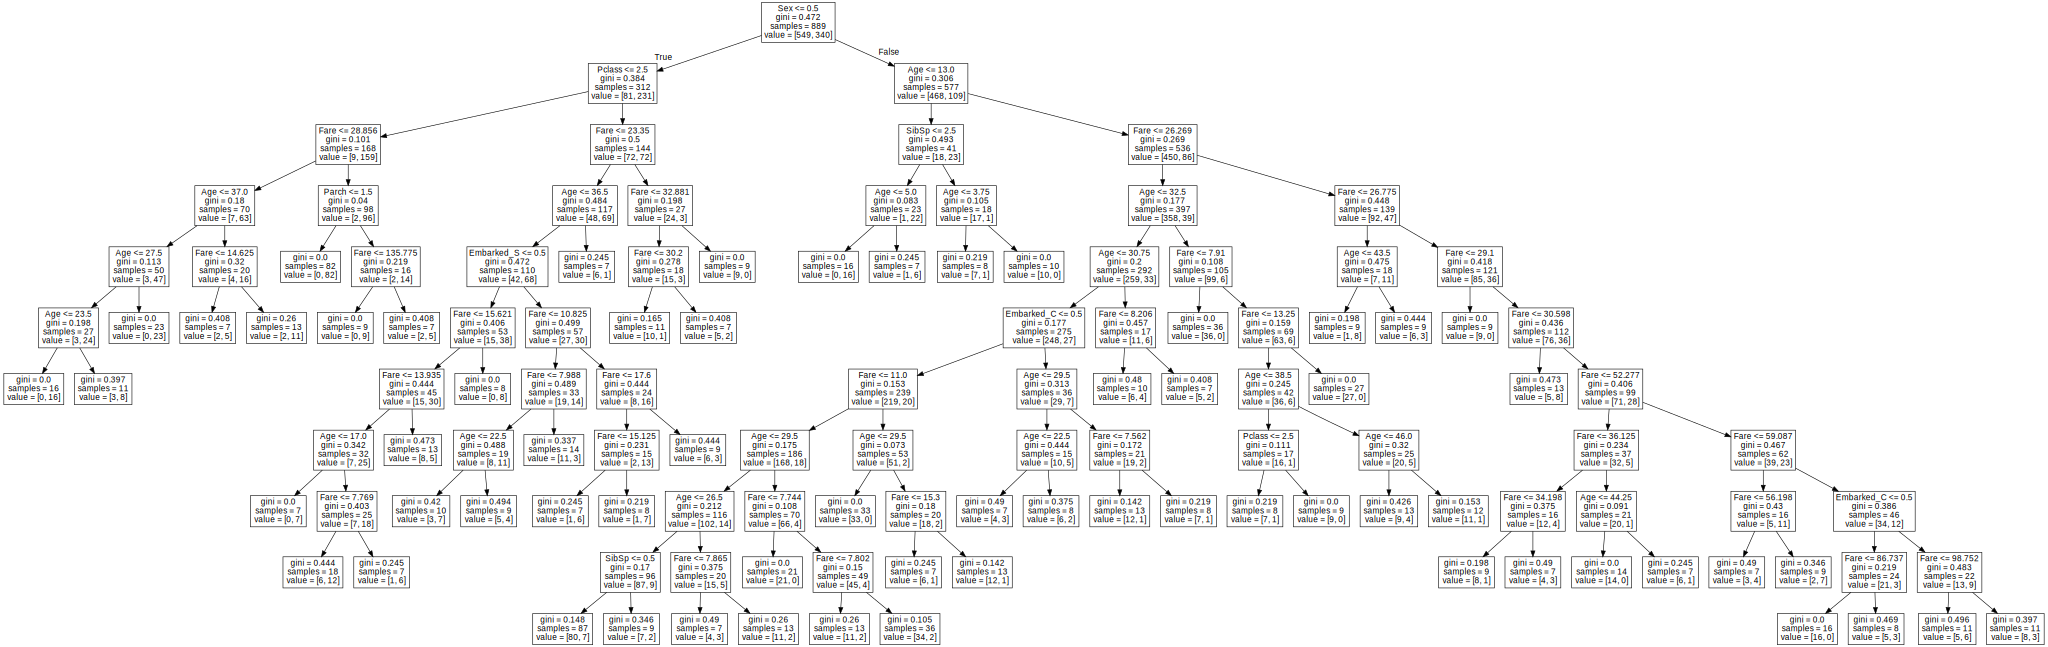

In [32]:
# con export_graphviz
dot_data = tree.export_graphviz(arbol_titanic, 
                                out_file=None, 
                                feature_names=list(X.columns)) 
graph = graphviz.Source(dot_data) 
graph

## 0604 Realiza una predicción
Realiza una predicción con tu árbol y comprueba cuánto ha acertado.

In [ ]:
# Predicción
prediccion = arbol_titanic.predict(X)

In [ ]:
# Precisión de la predicción
accuracy_score(y, prediccion)